# Sesta lezione di laboratorio

Il sistema che si vuole simulare è un sistema infinito di particelle disposte su una retta ed equispaziate. Per fare questo sono state prese in considerazione 50 particelle, alle quali sono state applicate le condizioni periodiche al contorno. Viene supposto che possiedano spin $s=1/2$, e di conseguenza un momento magnetico intrinseco. Le interazioni possibili sono quindi gli accoppiamenti degli spin tra loro, e degli spin con un campo magnetico esterno uniforme.
L'interazione tra gli spin viene considerata a breve range, cioè ogni spin interagisce unicamente con i due ad esso adiacenti (tenendo presente le condizioni periodiche al contorno).
L'hamiltoniana globale ha quindi la forma
$$H = -J\sum_{i=1}^{50} s_i s_{i+1}-\frac{h}{2}\sum_{i=1}^{50} (s_i + s_{i+1})$$

Viene effettuata l'ipotesi che il sistema sia ferromagnetico, cioè che la situazione energeticamente più favorevole sia quella in cui gli spin adiacenti siano paralleli e quindi $J=1>0$ per semplicità.

È stato scelto di far partire la simulazione da una configurazione in cui i due valori della componente z dello spin sono equiprobabili. Ogni simulazione viene effettuata due volte: la prima volta facendo evolvere il sistema con l'algoritmo di Metropolis, la seconda volta con l'algoritmo di Gibbs. Nel primo algoritmo, uno step Montecarlo è costituito dalla proposta di variazione di ciascuno dei 50 spin della configurazione e per ciascuno di questi spin la proposta può essere accettata o rifiutata. La probabilità di accettazione è dipendente dal valore attuale dello spin considerato, ed è favorevole ad una situazione di energia minore. Nel secondo algoritmo, uno step Montecarlo è costituito dall'assegnazione di un nuovo valore a ciascuno degli spin della considerazione, e la probabilità con cui il nuovo valore verrà assegnato non dipende dal valore attuale dello spin considerato, ma unicamente dal diverso valore di energia.

Partire dalla configurazione sopra detta è equivalente a scegliere un punto di partenza all'equilibrio a $T=\infty$ per il sistema, dove l'energia è talmente alta da rendere la differenza di energia tra le configurazioni irrilevante. Quindi la necessità di equilibrare il sistema è massima quando la simulazione viene effettuata a basse temperature. A titolo di esempio, di seguito viene mostrata l'evoluzione della magnetizzazione nei primi 500 steps di una simulazione a $T=0.5$.
L'effetto della partenza da un punto lontano dall'equilibrio svanisce dopo circa 300 passi Montecarlo.

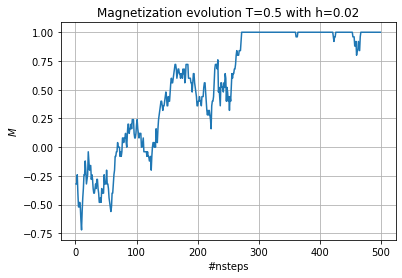

In [47]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x, m_evo = np.loadtxt("magnetization_evolution.dat", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure()
plt.plot(x, m_evo)
plt.title('Magnetization evolution T=0.5 with h=0.02')
plt.xlabel('#nsteps')
plt.ylabel('$M$')
plt.grid(True)
plt.show()

Per quanto detto sopra, per ogni simulazione a temperatura differente è stata prima creata una configurazione del sistema all'equilibrio da cui partire ed è stata implementata la possibilità per l'algoritmo di leggere la configurazione di partenza da quella generata con l'equilibrazione. Le simulazioni sono state effettuate alle temperature $T=0.5,\, 0.6,\, 0.7,\, ...,\, 2.0$, una volta per ogni algoritmo, per un totale di 32 simulazioni.
Ogni simulazione è stata suddivisa in $20$ blocchi, ciascuno costituito da $10^4$ steps Montecarlo sopra descritti.
Sono state misurate le seguenti grandezze e i relativi errori tramite blocking method: energia, capacità termica, magnetizzazione e suscettività magnetica.
Energia, capacità termica e suscettività magnetica sono state misurate nella condizione di campo nullo $h=0$, mentre la magnetizzazione è stata misurata nella condizione $h=0.02$.

Di seguito sono riportati, in funzione della temperatura, il valore dell'energia ottenuto tramite la soluzione analitica del modello di Ising e il confronto di questo valore con quelli ottenuti con l'algoritmo di Metropolis e con l'algoritmo di Gibbs.

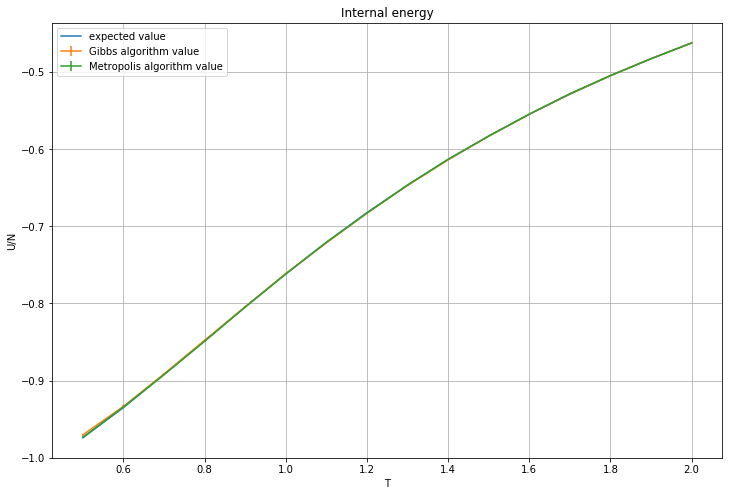

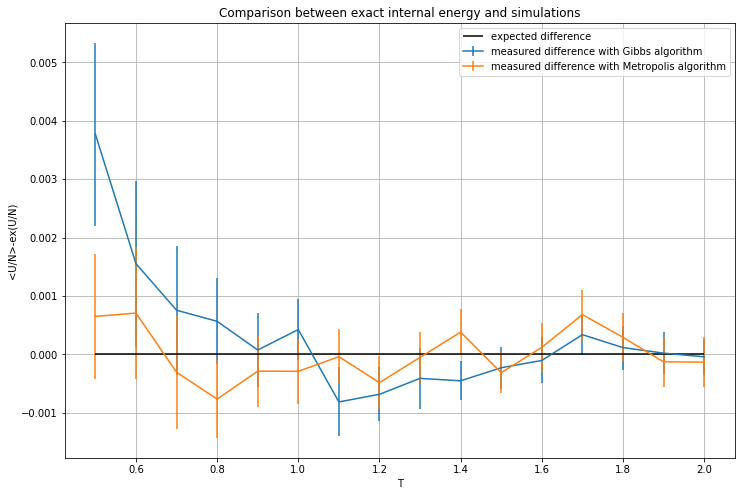

In [41]:
points=16
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

T_gibbs, E_gibbs, E_gibbs_error = np.loadtxt("gibbs_ene.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
T_metro, E_metro, E_metro_error = np.loadtxt("metro_ene.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(12, 8))
plt.plot(T, e, label='expected value')
plt.errorbar(T_gibbs, E_gibbs, E_gibbs_error, label='Gibbs algorithm value')
plt.errorbar(T_metro, E_metro, E_metro_error, label='Metropolis algorithm value')
plt.title('Internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.grid(True)
plt.legend()

plt.figure(figsize=(12, 8))
plt.errorbar(T_gibbs, E_gibbs-e, E_gibbs_error, label='measured difference with Gibbs algorithm')
plt.errorbar(T_metro, E_metro-e, E_metro_error, label='measured difference with Metropolis algorithm')
plt.title('Comparison between exact internal energy and simulations')
plt.xlabel('T')
plt.ylabel('<U/N>-ex(U/N)')
plt.hlines(0, 0.5, 2.0, label='expected difference')
plt.grid(True)
plt.legend()

plt.show()

Di seguito sono riportati, in funzione della temperatura, il valore della capacità termica ottenuto tramite la soluzione analitica del modello di Ising e il confronto di questo valore con quelli ottenuti con l'algoritmo di Metropolis e con l'algoritmo di Gibbs.

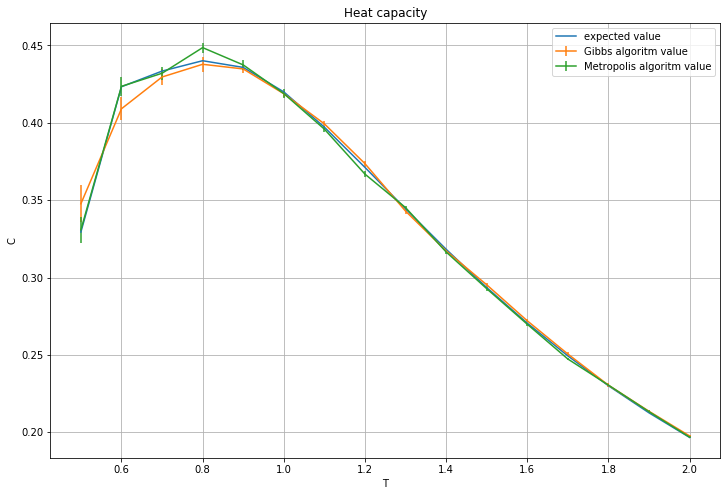

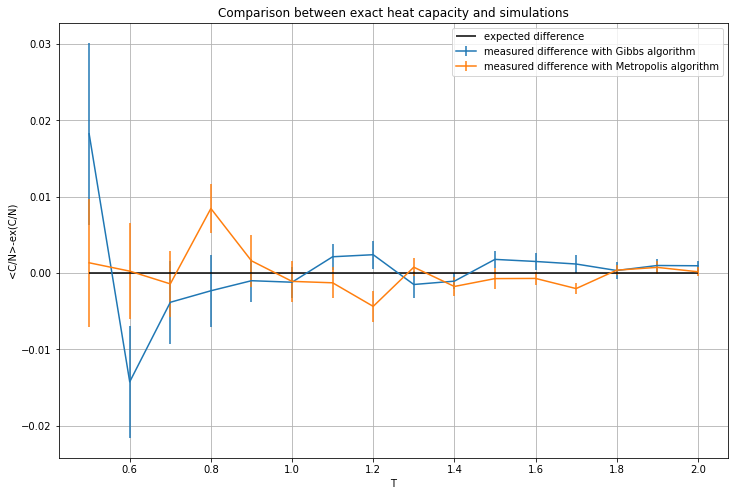

In [42]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

T_gibbs, C_gibbs, C_gibbs_error = np.loadtxt("gibbs_heat.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
T_metro, C_metro, C_metro_error = np.loadtxt("metro_heat.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(12, 8))
plt.plot(T, heat, label='expected value')
plt.errorbar(T_gibbs, C_gibbs, C_gibbs_error, label='Gibbs algoritm value')
plt.errorbar(T_metro, C_metro, C_metro_error, label='Metropolis algoritm value')
plt.title('Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.grid(True)
plt.legend()

plt.figure(figsize=(12, 8))
plt.errorbar(T_gibbs, C_gibbs-heat, C_gibbs_error, label='measured difference with Gibbs algorithm')
plt.errorbar(T_metro, C_metro-heat, C_metro_error, label='measured difference with Metropolis algorithm')
plt.title('Comparison between exact heat capacity and simulations')
plt.xlabel('T')
plt.ylabel('<C/N>-ex(C/N)')
plt.hlines(0, 0.5, 2.0, label='expected difference')
plt.grid(True)
plt.legend()

plt.show()

Di seguito sono riportati, in funzione della temperatura, il valore della magnetizzazione ottenuto tramite la soluzione analitica del modello di Ising e il confronto di questo valore con quelli ottenuti con l'algoritmo di Metropolis e con l'algoritmo di Gibbs.

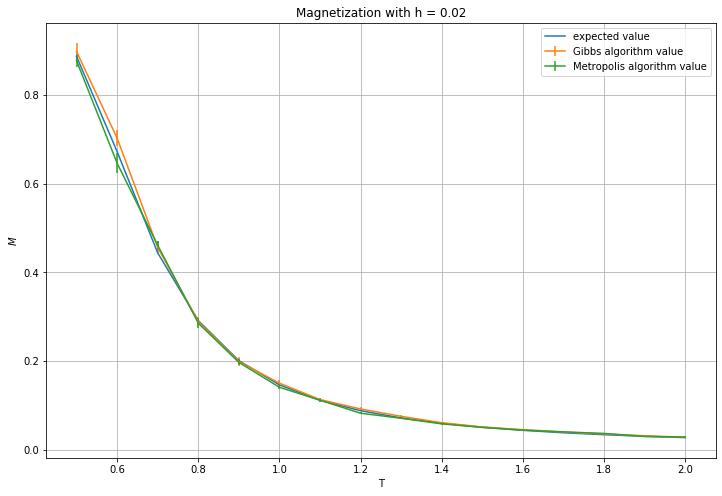

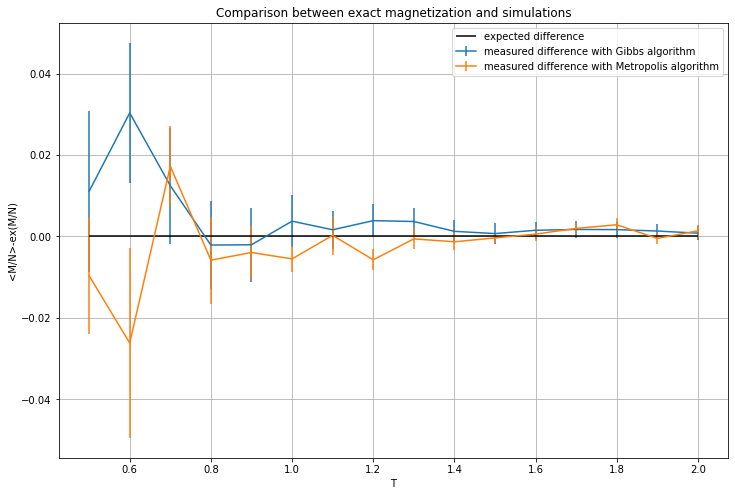

In [43]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
T_gibbs, M_gibbs, M_gibbs_error = np.loadtxt("gibbs_mag.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
T_metro, M_metro, M_metro_error = np.loadtxt("metro_mag.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(12, 8))
plt.plot(T, M, label='expected value')
plt.errorbar(T_gibbs, M_gibbs, M_gibbs_error, label='Gibbs algorithm value')
plt.errorbar(T_metro, M_metro, M_metro_error, label='Metropolis algorithm value')
plt.title('Magnetization with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.grid(True)
plt.legend()

plt.figure(figsize=(12, 8))
plt.errorbar(T_gibbs, M_gibbs-M, M_gibbs_error, label='measured difference with Gibbs algorithm')
plt.errorbar(T_metro, M_metro-M, M_metro_error, label='measured difference with Metropolis algorithm')
plt.title('Comparison between exact magnetization and simulations')
plt.xlabel('T')
plt.ylabel('<M/N>-ex(M/N)')
plt.hlines(0, 0.5, 2.0, label='expected difference')
plt.grid(True)
plt.legend()

plt.show()

Di seguito sono riportati, in funzione della temperatura, il valore della suscettività magnetica ottenuto tramite la soluzione analitica del modello di Ising e il confronto di questo valore con quelli ottenuti con l'algoritmo di Metropolis e con l'algoritmo di Gibbs.

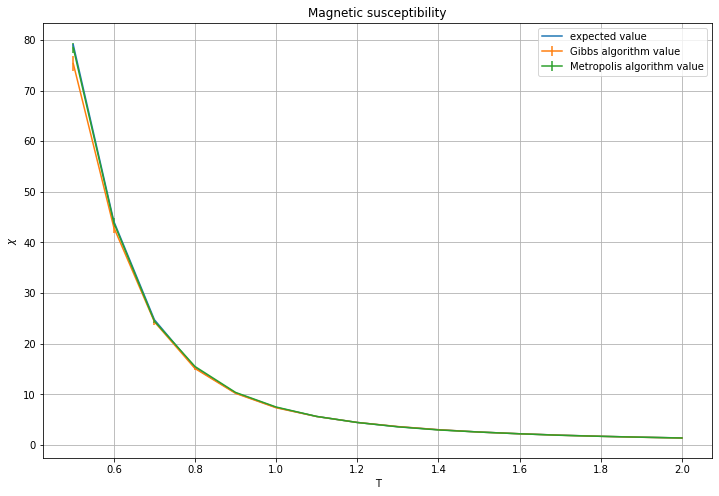

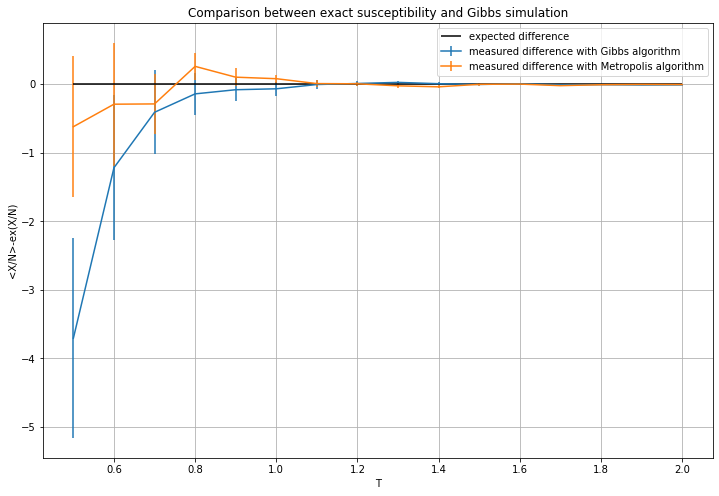

In [44]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
T_gibbs, X_gibbs, X_gibbs_error = np.loadtxt("gibbs_chi.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
T_metro, X_metro, X_metro_error = np.loadtxt("metro_chi.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(12, 8))
plt.plot(T, X, label='expected value')
plt.errorbar(T_gibbs, X_gibbs, X_gibbs_error, label='Gibbs algorithm value')
plt.errorbar(T_metro, X_metro, X_metro_error, label='Metropolis algorithm value')
plt.title('Magnetic susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.grid(True)
plt.legend()

plt.figure(figsize=(12, 8))
plt.errorbar(T_gibbs, X_gibbs-X, X_gibbs_error, label='measured difference with Gibbs algorithm')
plt.errorbar(T_metro, X_metro-X, X_metro_error, label='measured difference with Metropolis algorithm')
plt.title('Comparison between exact susceptibility and Gibbs simulation')
plt.xlabel('T')
plt.ylabel('<X/N>-ex(X/N)')
plt.hlines(0, 0.5, 2.0, label='expected difference')
plt.grid(True)
plt.legend()

plt.show()

Dalle figure precedenti risulta che i risultati dell'algoritmo di Gibbs e dell'algoritmo di metropolis sono compatibili con la soluzione analitica del modello di Icing 1D. È possibile inoltre notare a basse temperature un sistematico aumento dell'incertezze sulle grandezze misurate. Questo è dovuto al fatto che gli algoritmi utilizzati a basse temperature portano la configurazione degli spin verso la configurazione minima. A questo punto per ottenere la media statistica della grandezza misurata è necessario che l'algoritmo campioni l'intorno del minimo e si discosti da esso sempre meno frequentemente al diminuire della temperatura. Questa minore frequenza provoca un aumento del tempo necessario ad ottenere delle medie accurate.